## Ashim Sedhain
## MSCS-634-B01: Advanced Big Data and Data Mining
## Lab 2: Classification Using KNN and RNN Algorithms

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sk_wine = load_wine()

df_wine = pd.DataFrame(sk_wine.data, columns=sk_wine.feature_names)
df_wine['target'] = sk_wine.target

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
print("Shape of dataset:", df_wine.shape)
print("\nFeature names:", sk_wine.feature_names)
print("\nTarget names:", sk_wine.target_names)

print("\nClass distribution:")
print(df_wine['target'].value_counts())

df_wine.describe()

Shape of dataset: (178, 14)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

k = 1, Accuracy = 0.9722
k = 5, Accuracy = 0.9722
k = 11, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 21, Accuracy = 1.0000


In [10]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"Radius = {r}, Accuracy = {acc:.4f}")

Radius = 350, Accuracy = 0.3889
Radius = 400, Accuracy = 0.3889
Radius = 450, Accuracy = 0.3889
Radius = 500, Accuracy = 0.3889
Radius = 550, Accuracy = 0.3889
Radius = 600, Accuracy = 0.3889


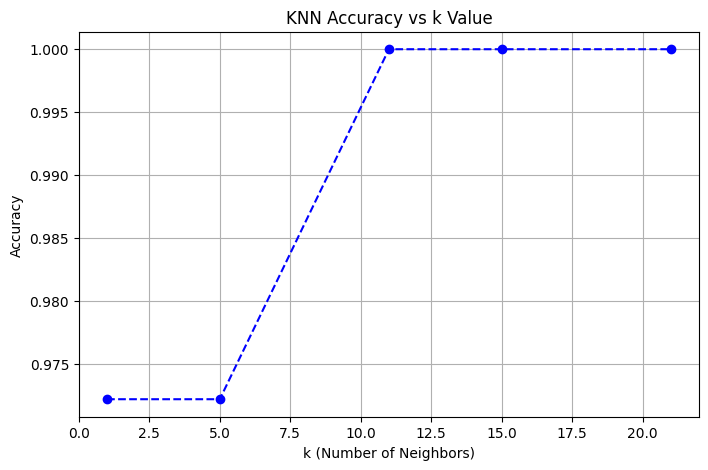

In [11]:
plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='--', color='blue')
plt.title('KNN Accuracy vs k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

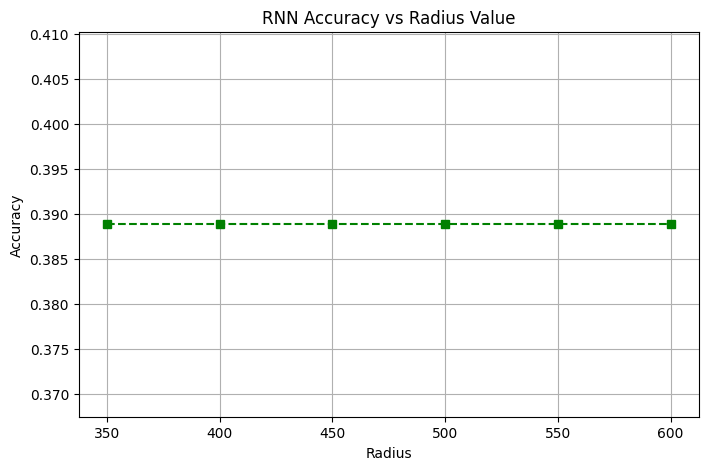

In [12]:
plt.figure(figsize=(8,5))
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='--', color='green')
plt.title('RNN Accuracy vs Radius Value')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [13]:
print("KNN Accuracies:")
for k, acc in zip(k_values, knn_accuracies):
    print(f"k = {k}: {acc:.4f}")

print("\nRNN Accuracies:")
for r, acc in zip(radius_values, rnn_accuracies):
    print(f"radius = {r}: {acc:.4f}")

KNN Accuracies:
k = 1: 0.9722
k = 5: 0.9722
k = 11: 1.0000
k = 15: 1.0000
k = 21: 1.0000

RNN Accuracies:
radius = 350: 0.3889
radius = 400: 0.3889
radius = 450: 0.3889
radius = 500: 0.3889
radius = 550: 0.3889
radius = 600: 0.3889
